<a href="https://colab.research.google.com/github/xuefeng-hao/L-DUR/blob/main/heatmap_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


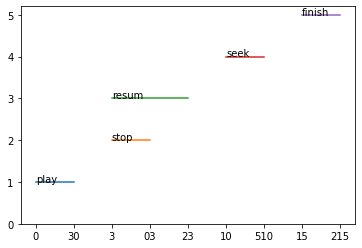

In [6]:
import csv
import matplotlib.pyplot as plt

class plot:
  def write_csv(self,csv_file):
    rows = [['event','start time','duration'],['play',0,3],['stop',3,0],['resum',3,2],['seek',10,5],['finish',15,2]]
    with open(csv_file,'w') as f:
      writer = csv.writer(f)
      writer.writerows(rows)
  def plot_event(self,csv_file):
    with open(csv_file,'r') as f:
      reader = csv.reader(f)
      header = next(reader)
      n = 1
      for row in reader:
        row[1]=int(row[1])
        
        plt.plot([row[1],row[2]+row[1]],[n,n])
        plt.annotate(row[0],xy=(row[1],n))
        n +=1
      plt.yticks(range(0, n, 1))
      plt.show()
p = plot()
p.write_csv('data_video.csv')
p.plot_event('data_video.csv')


[[1 2 2 4 4 2 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 2 2 2 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


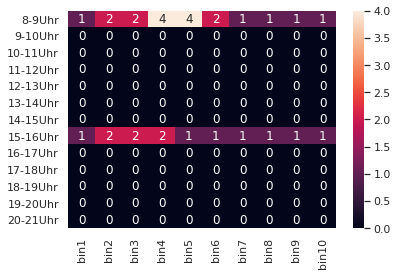

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
%matplotlib inline


class plot:
  def write_csv(self,csv_file):
    rows = [['event','start time','duration',],['play',0,3],['stop',3,0],['resum',3,2],['seek',11,4],['finish',15,0],['play',0,15],['seek',1,11]]
    with open(csv_file,'w') as f:
      writer = csv.writer(f)
      writer.writerows(rows)
  def plot_event(self,csv_file):
    with open(csv_file,'r') as f:
      reader = csv.reader(f)
      header = next(reader)
      n = 1
      for row in reader:
        row[1]=int(row[1])
        row[2]=int(row[2])
        print(row[0])
        if row[0] in ['stop','finish']:
          print(n)
          plt.plot(row[1],n,'om')
        else:
          plt.plot([row[1],row[2]+row[1]],[n,n])
        plt.annotate(row[0],xy=(row[1],n))
        n +=1
      plt.yticks(range(0, n, 1))
      plt.xticks(range(0, 16, 1))
      plt.savefig('event_plot.jpg')
      plt.show()
  def plot_hist(self,csv_file):
    with open(csv_file,'r') as f:
      reader = csv.reader(f)
      header = next(reader)
      video_lang = 15
      bin = video_lang
      video_resolution = video_lang/bin
      data = [0]*bin
      for row in reader:
        if row[0] not in ['stop','finish']:
          index1 = int(int(row[1])/video_resolution)
          index2 = int(int(row[2])/video_resolution)+index1

          for i in range(index1,index2):
            data[i]+=1
      x_ax = np.linspace(0, 15, num=15)
      plt.bar(x_ax,data)
      plt.xticks(range(0, 16, 1))
      plt.show()
  def plot_heatmap(self): 
    columns = ['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10']
    index = ['8-9Uhr','9-10Uhr','10-11Uhr', '11-12Uhr', '12-13Uhr', '13-14Uhr', '14-15Uhr',
 '15-16Uhr', '16-17Uhr', '17-18Uhr', '18-19Uhr', '19-20Uhr', '20-21Uhr']
    data_heat = np.array([
                [1,2,2,4,4,2,1,1,1,1],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [1,2,2,2,1,1,1,1,1,1],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0]])
    data_heat_pd = pd.DataFrame(data=data_heat,
                        index=index,
                        columns=columns)
 
    print(data_heat)
    sns.set(style='whitegrid', color_codes=True)
    sns.heatmap(data_heat_pd,annot=True)
    #sns.set_xticklabels(ax.get_xticklabels(), rotation=-90)

p = plot()
#p.write_csv('data_video.csv')
#p.plot_event('data_video.csv')
#p.plot_hist('data_video.csv')
p.plot_heatmap()

